In [6]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [7]:
df=pd.read_csv('C:\Data\Custom\income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


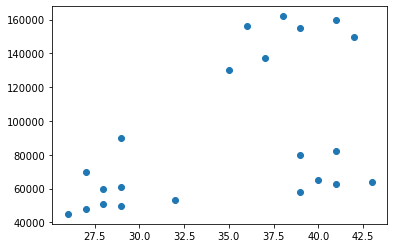

In [8]:
plt.scatter(df['Age'],df['Income($)'])

In [13]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(df.drop('Name',axis=1))
y_predict

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [14]:
df['cluster']=y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


No handles with labels found to put in legend.


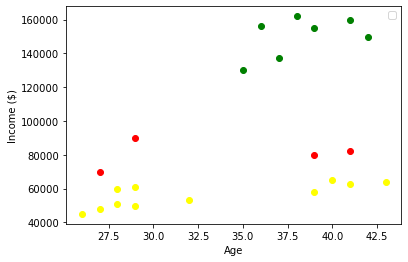

In [17]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1['Age'],df1['Income($)'],color='red')
plt.scatter(df2['Age'],df2['Income($)'],color='green')
plt.scatter(df3['Age'],df3['Income($)'],color='yellow')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [23]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [25]:
kn= KMeans(n_clusters=3)
y_pred=kn.fit_predict(df.drop(['Name','cluster'],axis=1))
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [26]:
df['cluster']=y_pred
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


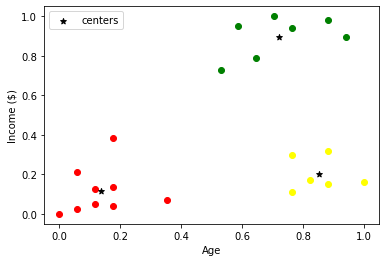

In [35]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1['Age'],df1['Income($)'],color='red')
plt.scatter(df2['Age'],df2['Income($)'],color='green')
plt.scatter(df3['Age'],df3['Income($)'],color='yellow')

plt.xlabel('Age')
plt.ylabel('Income ($)')

plt.scatter(kn.cluster_centers_[:,0],kn.cluster_centers_[:,1],color='black',marker='*',label='centers')

plt.legend()

In [30]:
kn.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [36]:

sum_of_squared_error=[]
for k in range (1,10):
    kn=KMeans(n_clusters=k)
    kn.fit_predict(df[['Age','Income($)']])
    sum_of_squared_error.append(kn.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
sum_of_squared_error

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.2776818715436998,
 0.22037641690770662,
 0.16858512236029757,
 0.13706529523670866,
 0.1110509353733114]

Text(0, 0.5, 'sse')

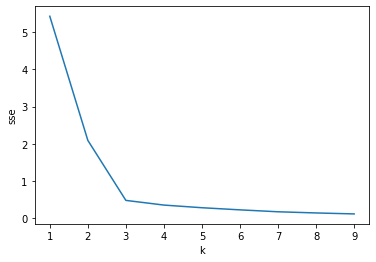

In [39]:
plt.plot(range(1,10),sum_of_squared_error)
plt.xlabel('k')
plt.ylabel('sse')